Saving apps.csv to apps.csv
First 5 rows of dataset:
   Unnamed: 0                                                App  \
0           0     Photo Editor & Candy Camera & Grid & ScrapBook   
1           1                                Coloring book moana   
2           2  U Launcher Lite – FREE Live Cool Themes, Hide ...   
3           3                              Sketch - Draw & Paint   
4           4              Pixel Draw - Number Art Coloring Book   

         Category  Rating  Reviews  Size     Installs  Type Price  \
0  ART_AND_DESIGN     4.1      159  19.0      10,000+  Free     0   
1  ART_AND_DESIGN     3.9      967  14.0     500,000+  Free     0   
2  ART_AND_DESIGN     4.7    87510   8.7   5,000,000+  Free     0   
3  ART_AND_DESIGN     4.5   215644  25.0  50,000,000+  Free     0   
4  ART_AND_DESIGN     4.3      967   2.8     100,000+  Free     0   

  Content Rating                     Genres      Last Updated  \
0       Everyone               Art & Design   January 7, 2

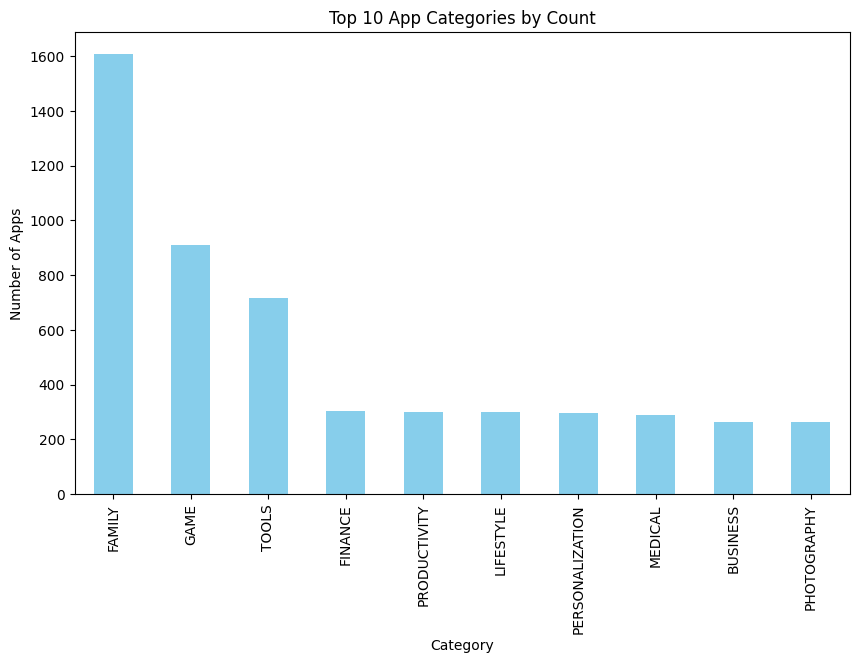

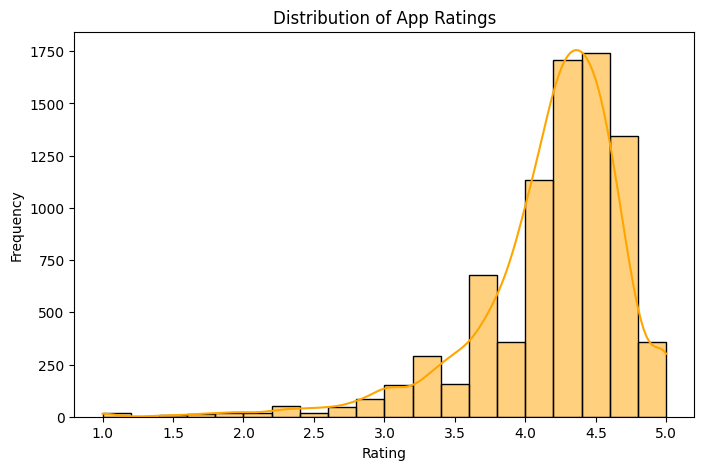

/tmp/ipython-input-744707100.py:68: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Installs', y='App', data=top_installed, palette='viridis')


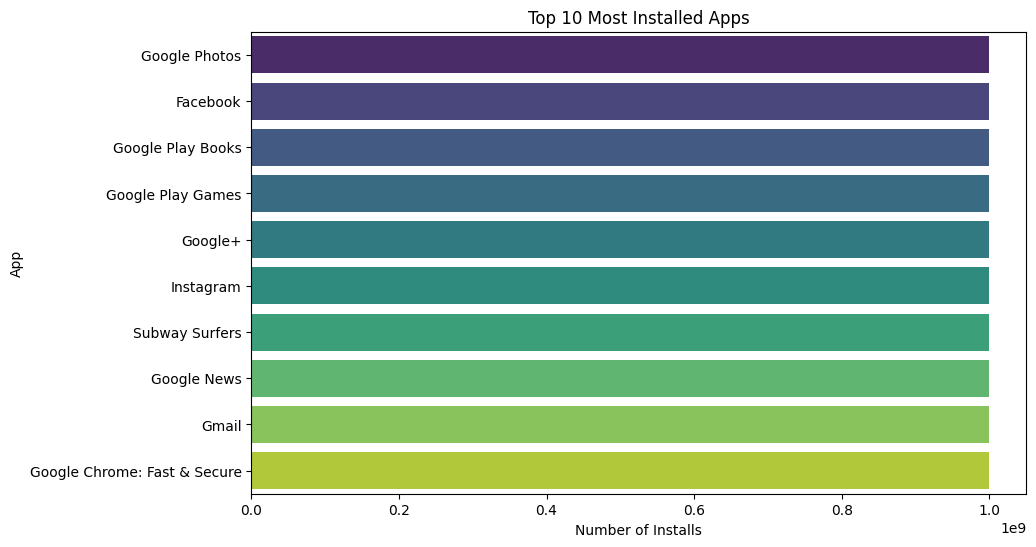

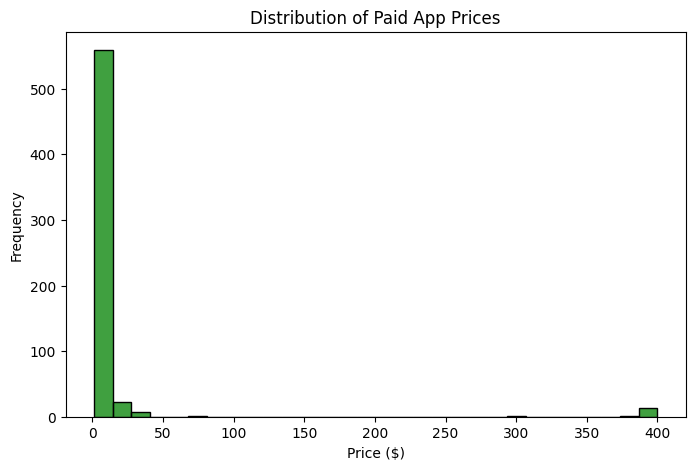

/tmp/ipython-input-744707100.py:87: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_rating.values, y=avg_rating.index, palette='coolwarm')


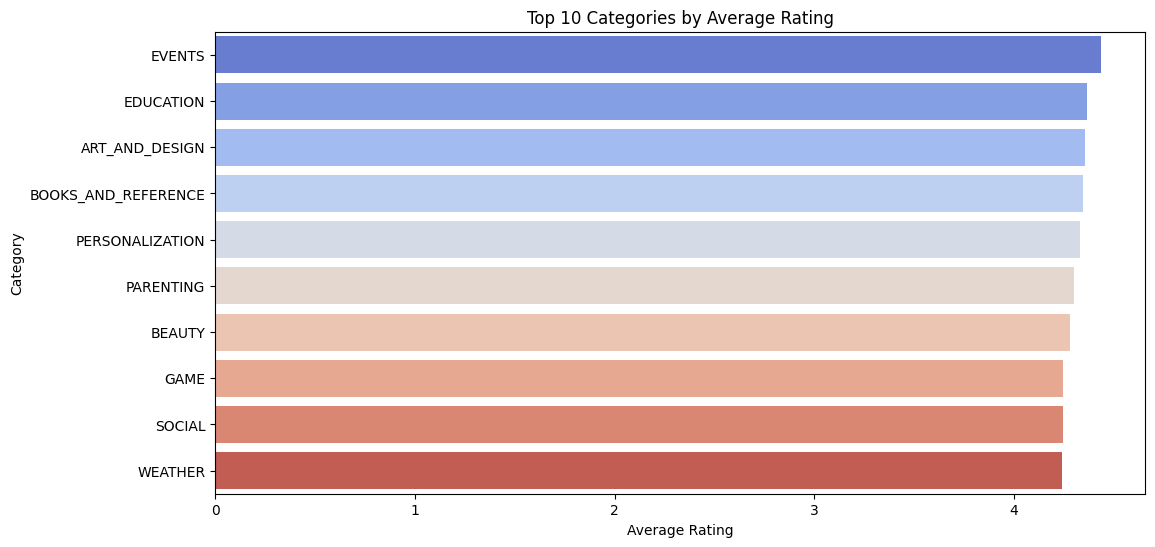


--- Key Insights ---
Total number of apps: 8196
Most common category: FAMILY
Average app rating: 4.17
Most installed app: Google Play Books


In [1]:
# ========================================
# Unveiling the Android App Market - Oasis Infobyte Task
# Google Colab Ready Code
# ========================================

# Step 1: Upload file
from google.colab import files
uploaded = files.upload()  # Select apps.csv from your computer

# Step 2: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Step 3: Load dataset
df = pd.read_csv("apps.csv")

# Step 4: Quick data check
print("First 5 rows of dataset:")
print(df.head())
print("\nDataset Info:")
print(df.info())
print("\nMissing values count:")
print(df.isnull().sum())

# Step 5: Data cleaning
df.drop_duplicates(inplace=True)

# Remove $ sign from Price column (if exists) and convert to float
if 'Price' in df.columns:
    df['Price'] = df['Price'].replace('[\$,]', '', regex=True).astype(float)

# Remove + and , from Installs column and convert to int
if 'Installs' in df.columns:
    df['Installs'] = df['Installs'].replace('[\+,]', '', regex=True).astype(int)

# Convert Rating to numeric
if 'Rating' in df.columns:
    df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')

# Drop rows with missing critical values
df.dropna(subset=['Rating'], inplace=True)

# Step 6: Exploratory Data Analysis (EDA)

# --- Top categories by number of apps ---
if 'Category' in df.columns:
    plt.figure(figsize=(10,6))
    df['Category'].value_counts().head(10).plot(kind='bar', color='skyblue')
    plt.title("Top 10 App Categories by Count")
    plt.xlabel("Category")
    plt.ylabel("Number of Apps")
    plt.show()

# --- Rating distribution ---
plt.figure(figsize=(8,5))
sns.histplot(df['Rating'], bins=20, kde=True, color='orange')
plt.title("Distribution of App Ratings")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.show()

# --- Most installed apps ---
if 'App' in df.columns and 'Installs' in df.columns:
    top_installed = df[['App', 'Installs']].sort_values(by='Installs', ascending=False).head(10)
    plt.figure(figsize=(10,6))
    sns.barplot(x='Installs', y='App', data=top_installed, palette='viridis')
    plt.title("Top 10 Most Installed Apps")
    plt.xlabel("Number of Installs")
    plt.ylabel("App")
    plt.show()

# --- Price distribution ---
if 'Price' in df.columns:
    plt.figure(figsize=(8,5))
    sns.histplot(df[df['Price'] > 0]['Price'], bins=30, color='green')
    plt.title("Distribution of Paid App Prices")
    plt.xlabel("Price ($)")
    plt.ylabel("Frequency")
    plt.show()

# --- Average rating by category ---
if 'Category' in df.columns:
    plt.figure(figsize=(12,6))
    avg_rating = df.groupby('Category')['Rating'].mean().sort_values(ascending=False).head(10)
    sns.barplot(x=avg_rating.values, y=avg_rating.index, palette='coolwarm')
    plt.title("Top 10 Categories by Average Rating")
    plt.xlabel("Average Rating")
    plt.ylabel("Category")
    plt.show()

# Step 7: Insights
print("\n--- Key Insights ---")
print(f"Total number of apps: {len(df)}")
if 'Category' in df.columns:
    print("Most common category:", df['Category'].mode()[0])
if 'Rating' in df.columns:
    print("Average app rating:", round(df['Rating'].mean(), 2))
if 'Installs' in df.columns:
    print("Most installed app:", df.loc[df['Installs'].idxmax(), 'App'])
